## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Reading the dataset

In [2]:
df = pd.read_csv("employee_promotion.csv")

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


## Data Analysis and Preprocessing

### null values

In [6]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
46376,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
46377,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
46378,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [8]:
df.drop(columns="employee_id", inplace=True)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


### Deviding Features

In [9]:
num_features = [i for i in df.columns if df.dtypes[i]!='object']
num_features

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

In [10]:
cat_features = [i for i in df.columns if df.dtypes[i]=='object']
cat_features

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [11]:
df[cat_features].nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

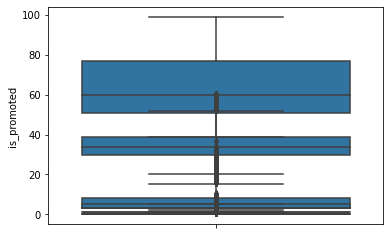

In [12]:
for i in num_features:
    plt.figsize=(10,5)
    sns.boxplot(y=df[i])
    plt.show

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

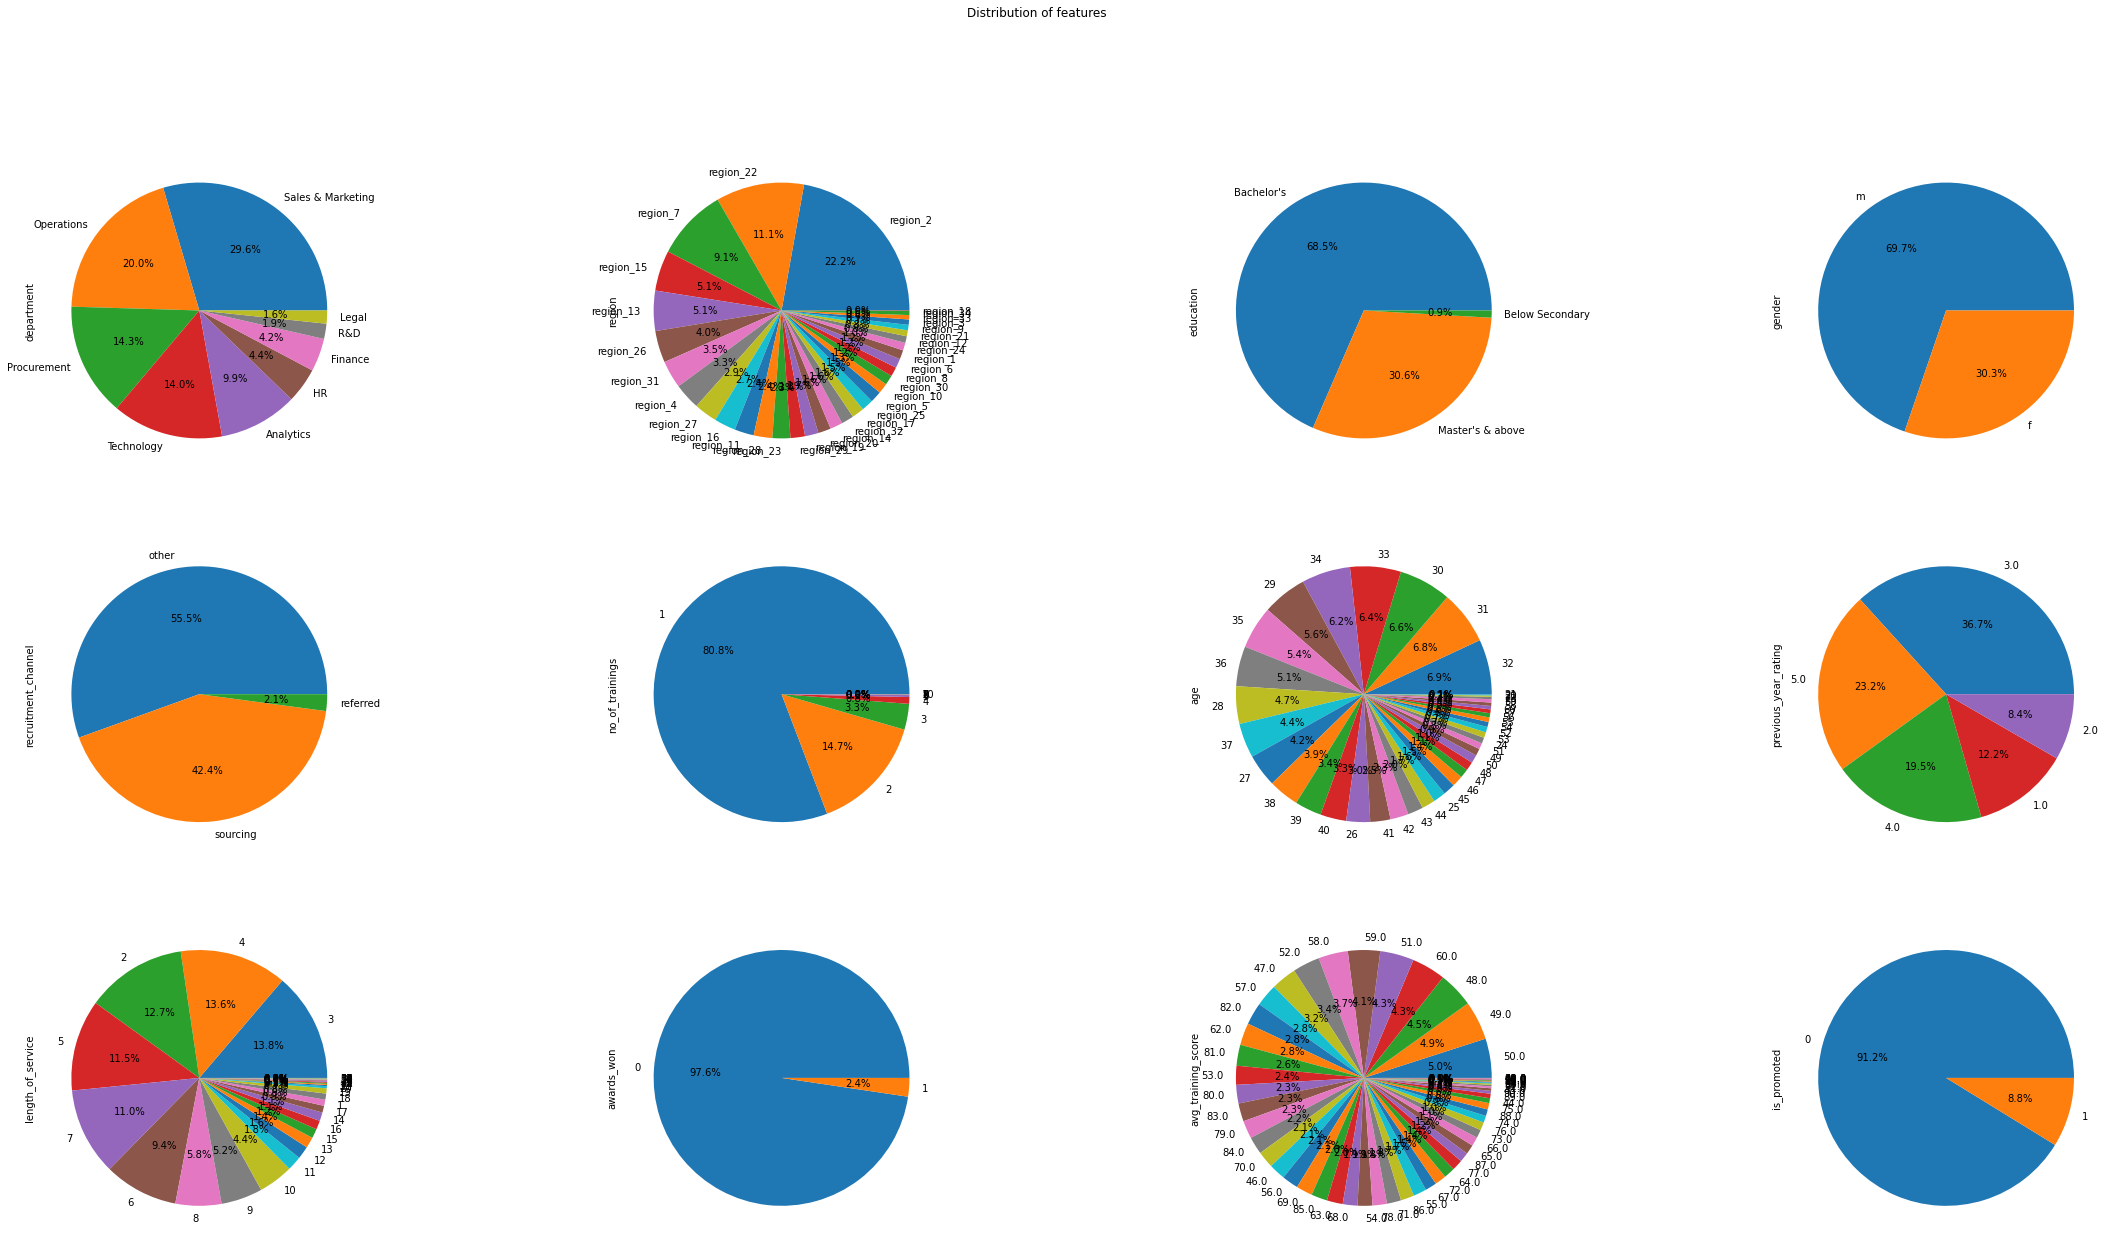

In [13]:
fig, axs=plt.subplots(nrows = 3, ncols = 4, figsize=(40,20))

for i, feature in enumerate(df.columns):
    row = int(i/4)
    col = i%4
    pd.value_counts(df.iloc[:,i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout


/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

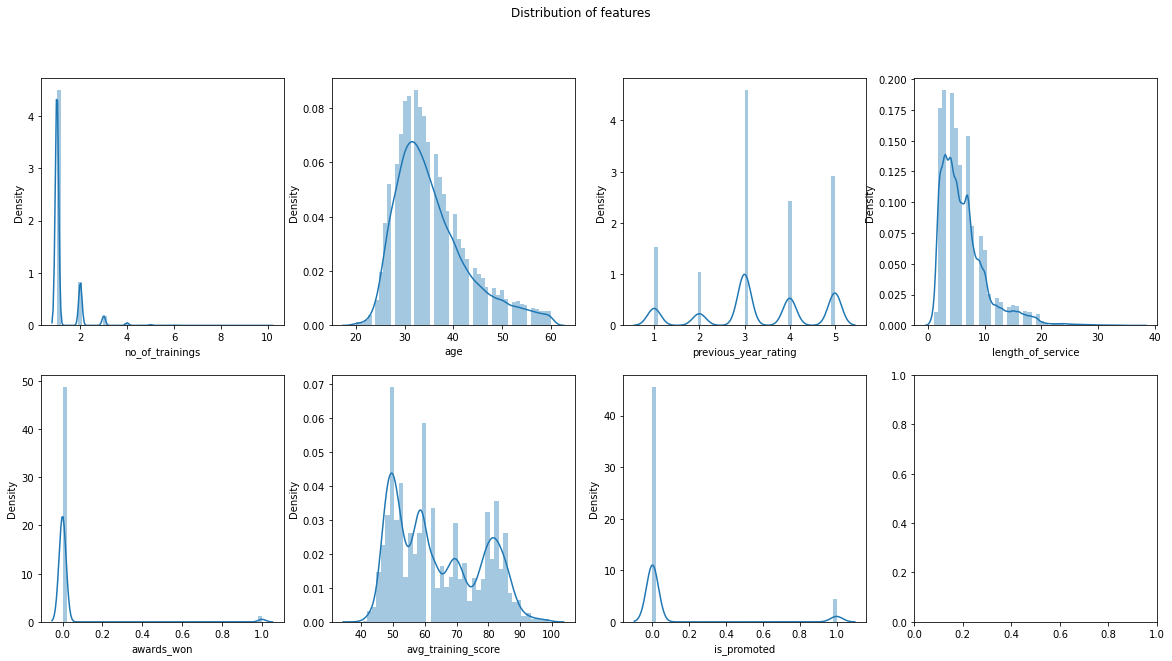

In [14]:
columns = [ 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(df[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(df[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout

## Plotting Q-Q Plot

In [15]:
import scipy.stats as stat
import pylab

In [16]:
def plot_curve(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

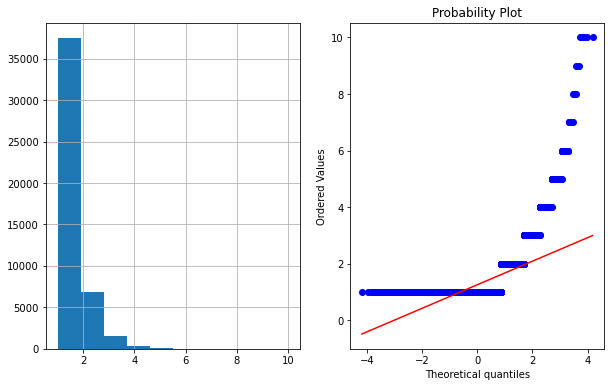

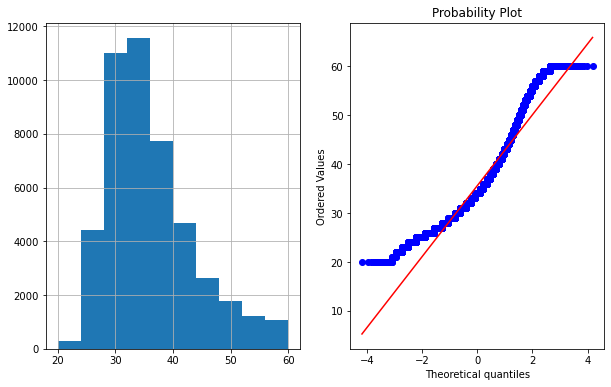

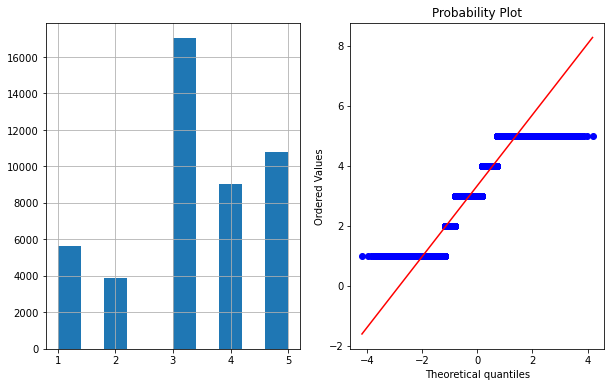

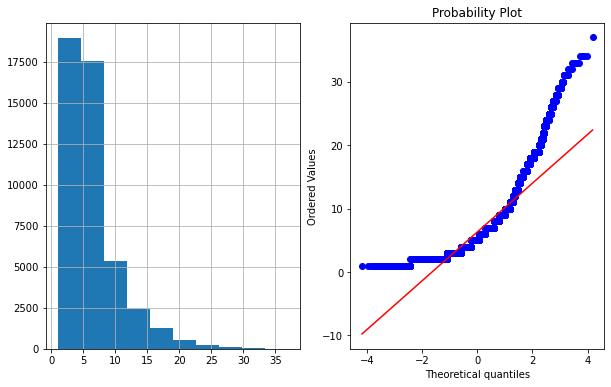

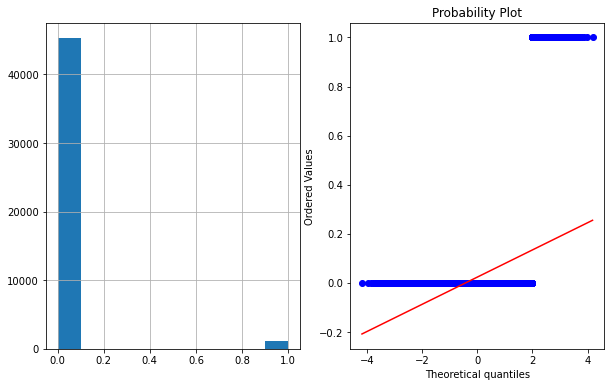

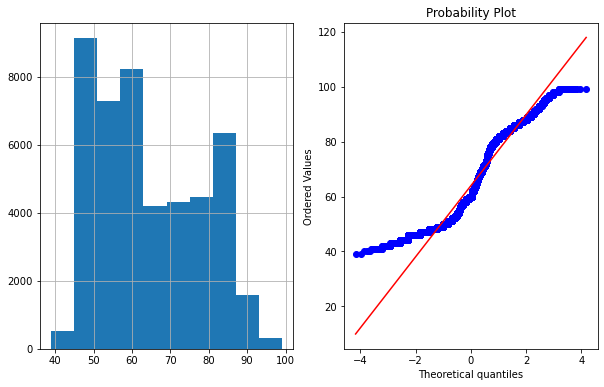

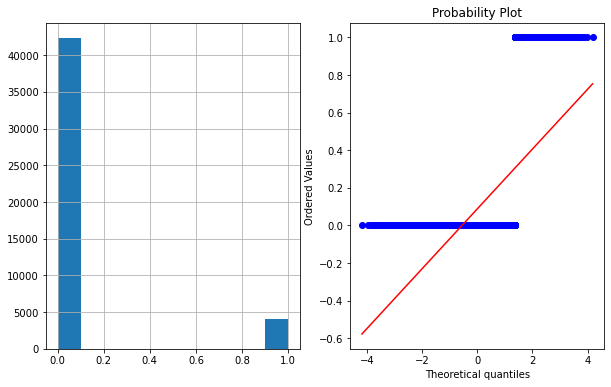

In [17]:
for feature in columns:
    plot_curve(df,feature)

## We need to do log transformation

#### To Understand the log transformation use this link
   - https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

In [18]:
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])

df.insert(6, 'age_log', age_log)
df.insert(9, 'length_of_service_log', service_log)
df.insert(12, 'avg_training_score_log', score_log)


In [19]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0


/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

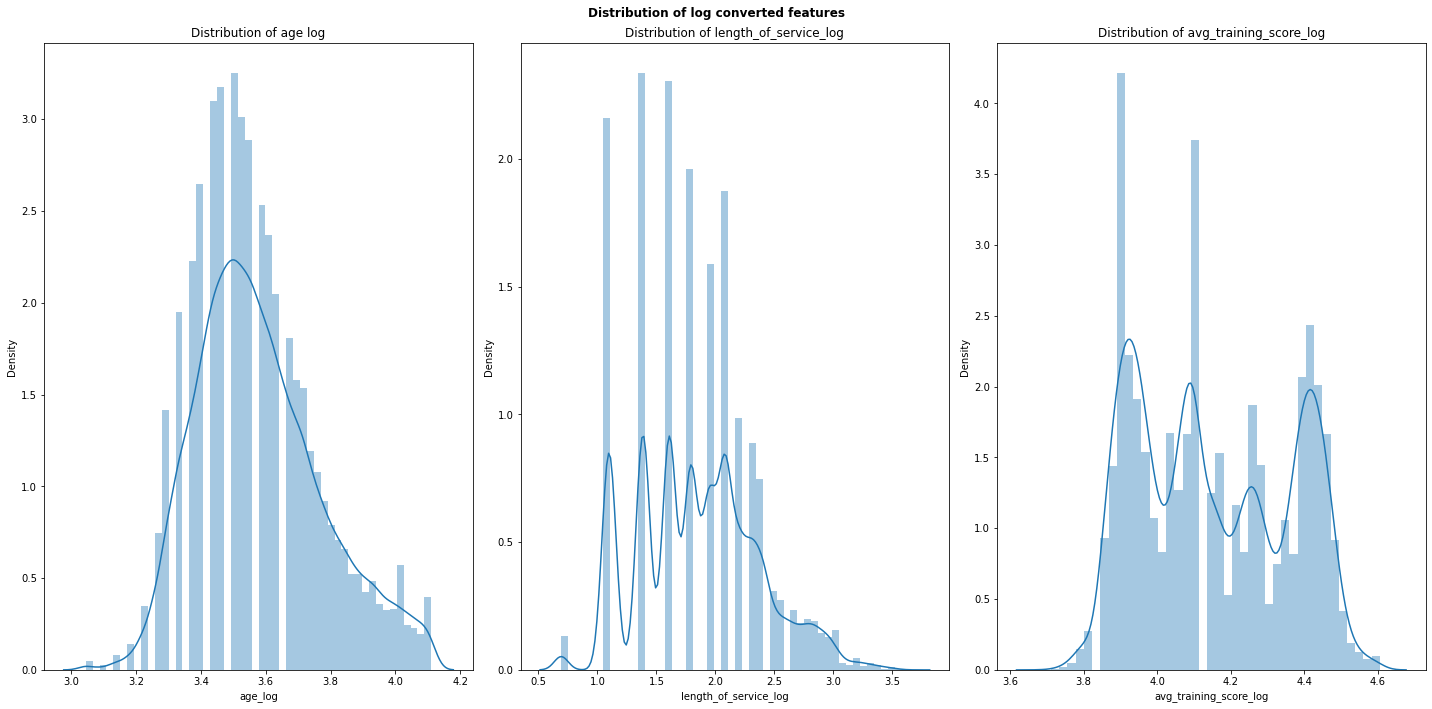

In [20]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(20,10))

sns.distplot(df['age_log'], ax=ax1)
ax1.set_title('Distribution of age log')
sns.distplot(df['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(df['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

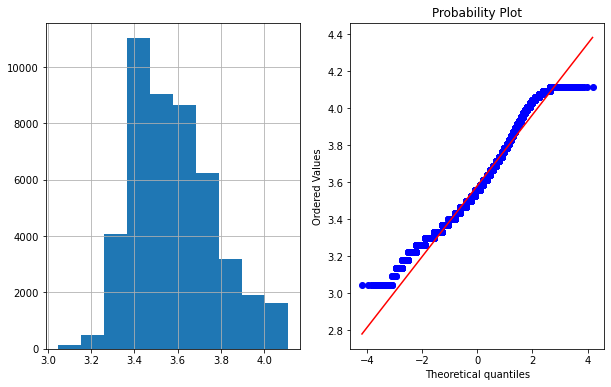

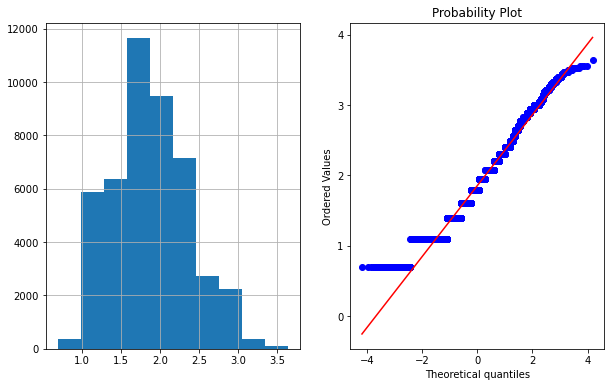

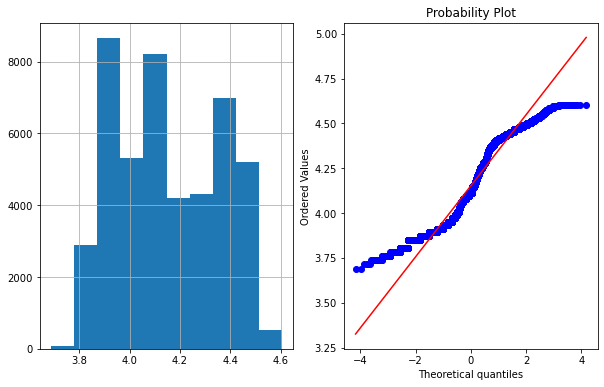

In [21]:
for feature in log_columns:
    plot_curve(df, feature)

### Heat map

/tmp/ipykernel_8289/1947701357.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths=0.5, cmap = 'YlGnBu')


<AxesSubplot:title={'center':'Correlation of features'}>

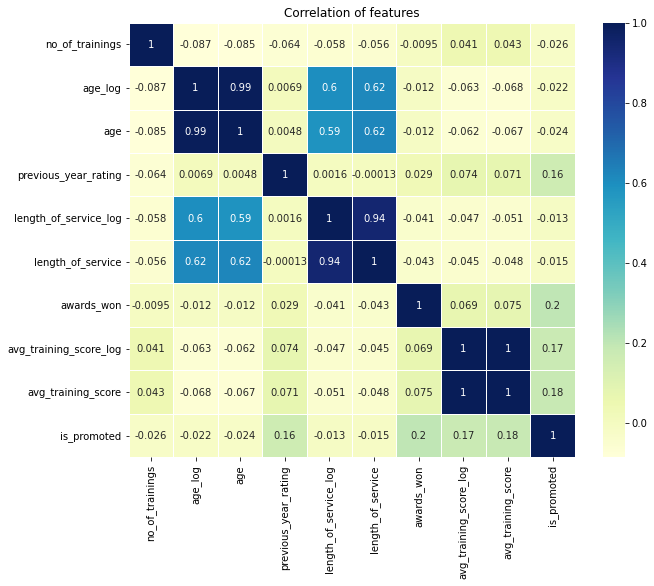

In [22]:
plt.figure(figsize=(10,8))
plt.title('Correlation of features')
sns.heatmap(df.corr(), annot = True, linewidths=0.5, cmap = 'YlGnBu')

## One Hot Encoding
- One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning.

In [23]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0,...,0,0,1,0,0,0,1,1,0,0


## Scalling our data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
features = np.array(df_encoded.columns).reshape(-1,1)

In [26]:
features

array([['no_of_trainings'],
       ['age_log'],
       ['age'],
       ['previous_year_rating'],
       ['length_of_service_log'],
       ['length_of_service'],
       ['awards_won'],
       ['avg_training_score_log'],
       ['avg_training_score'],
       ['is_promoted'],
       ['department_Analytics'],
       ['department_Finance'],
       ['department_HR'],
       ['department_Legal'],
       ['department_Operations'],
       ['department_Procurement'],
       ['department_R&D'],
       ['department_Sales & Marketing'],
       ['department_Technology'],
       ['region_region_1'],
       ['region_region_10'],
       ['region_region_11'],
       ['region_region_12'],
       ['region_region_13'],
       ['region_region_14'],
       ['region_region_15'],
       ['region_region_16'],
       ['region_region_17'],
       ['region_region_18'],
       ['region_region_19'],
       ['region_region_2'],
       ['region_region_20'],
       ['region_region_21'],
       ['region_region_22'],
   

In [27]:
for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature])
    df_encoded[feature] = scaler.transform(df_encoded[feature])
    
df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.418611,0.019377,-0.076052,1.324653,0.673784,0.402667,-0.155136,-1.177045,-1.111888,-0.310195,...,-0.109043,-0.083089,-1.474410,-0.09548,1.505848,1.518245,-1.518245,-1.117074,-0.146768,1.166064
1,-0.418611,-0.749600,-0.740379,1.324653,-0.474482,-0.549239,-0.155136,-0.202848,-0.292548,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
2,-0.418611,-0.125493,-0.208918,-0.263965,0.443690,0.164690,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,-1.117074,-0.146768,1.166064
3,1.226184,0.561202,0.455409,-1.852582,1.065803,0.878619,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
4,-0.418611,1.279937,1.252601,-0.263965,-1.472401,-1.025192,-0.155136,0.743621,0.675764,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586


## Splitting the data

In [28]:
x = df_encoded.drop(columns=['is_promoted'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [30]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (37104, 60)
Shape of X_test:  (9276, 60)
Shape of y_train:  (37104,)
Shape of y_test:  (9276,)


## Model Development

### Used the following models in this project:
- Decison Tree Classifier
- Random Forest Classifer 
- Logistci Regression

### Let us define a function which will give the different accuracy matrics

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

In [32]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Decision Tree

In [34]:
dt_clf = DecisionTreeClassifier()

In [35]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[: , 1]

In [36]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

Confusion Matrix
[[7878  595]
 [ 433  370]]
Accuracy: 0.8892, Precision: 0.6657, Recall 0.6953, F1: 0.6787, AUC:0.6951


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


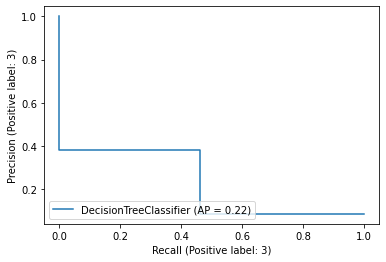

In [37]:
plot_precision_recall_curve(dt_clf, X_test, y_test)

## Logistic Regression

In [38]:
lr_clf = LogisticRegression()

In [39]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[: , 1]

In [40]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix
[[8458   15]
 [ 515  288]]
Accuracy: 0.9429, Precision: 0.9466, Recall 0.6784, F1: 0.7452, AUC:0.8070


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


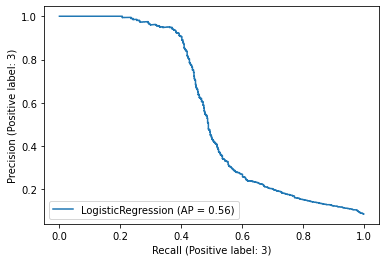

In [41]:
plot_precision_recall_curve(lr_clf, X_test, y_test)

## Random Forest

In [42]:
rf_clf = RandomForestClassifier()

In [43]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:,1]

In [44]:
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[8446   27]
 [ 510  293]]
Accuracy: 0.9421, Precision: 0.9293, Recall 0.6808, F1: 0.7455, AUC:0.7947


# Using Auto ML

### EvalML
- ### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.

## Installing EvalML

In [45]:
# !pip install evalml

In [46]:
# !pip install scikit-learn==1.1.2

### If any problem occurs with the scikit-learn version: 
- https://stackoverflow.com/questions/60321389/sklearn-importerror-cannot-import-name-plot-roc-curve

## Using the same train test dataset for automl

In [47]:
import evalml

In [48]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

### Running the automl to select best algorithm

In [49]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train = y_train, problem_type = 'binary')
automl.search()

{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Undersampler + Standard Scaler': '00:06',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Undersampler': '00:04',
  'Total time of batch': '00:10'},
 2: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Undersampler + Standard Scaler + RF Classifier Select From Model': '00:05',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Undersampler + RF Classifier Select From Model': '00:03',
  'Total time of batch': '00:09'},
 3: {'Decision Tree Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Undersampler + Select Columns Transformer': '00:03',
  'LightGBM Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Undersampler + Select Columns Transformer': '00:03',
  'Extra Trees Classifier w/ Label Encoder +

In [50]:
automl.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,LightGBM Classifier w/ Label Encoder + Replace...,6,0.241047,0.241047,0.000376,92.049449,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,10,XGBoost Classifier w/ Label Encoder + Replace ...,10,0.242098,0.242098,0.000154,92.014760,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,1,Logistic Regression Classifier w/ Label Encode...,1,0.253244,0.253244,0.001468,91.647156,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,3,Logistic Regression Classifier w/ Label Encode...,3,0.264169,0.264169,0.007540,91.286781,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,8,Elastic Net Classifier w/ Label Encoder + Repl...,8,0.269071,0.269071,0.001417,91.125105,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,4,Random Forest Classifier w/ Label Encoder + Re...,4,0.284748,0.284748,0.001138,90.608016,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.292398,0.292398,0.000482,90.355692,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,7,Extra Trees Classifier w/ Label Encoder + Repl...,7,0.294686,0.294686,0.001131,90.280232,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,5,Decision Tree Classifier w/ Label Encoder + Re...,5,0.343909,0.343909,0.014798,88.656708,False,"{'Label Encoder': {'positive_label': None}, 'I..."
9,9,CatBoost Classifier w/ Label Encoder + Replace...,9,0.517213,0.517213,0.001024,82.940530,False,"{'Label Encoder': {'positive_label': None}, 'I..."


In [51]:
automl.best_pipeline
best_pipeline = automl.best_pipeline

In [52]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


***********************************************************************************************************************************
* LightGBM Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Undersampler + Select Columns Transformer *
***********************************************************************************************************************************

Problem Type: binary
Model Family: LightGBM

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Replace Nullable Types Transformer
3. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
4. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
	 * sampling_ratio_dict : None
5. Select Columns Transformer
	 * columns : ['no_of_trainings', 'age_log', 'age', 'previous_year_rating', 'le

## Predicting the results

In [53]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

In [54]:
best_pipeline.score(X_test, y_test, objectives=['accuracy binary'])

OrderedDict([('Accuracy Binary', 0.9385510996119016)])

## Save and load our model in pickle file also

In [55]:
best_pipeline.save("model.pkl")
final_model = automl.load('model.pkl')

In [56]:
pred = final_model.predict(X_test)

In [57]:
pred

40585    0
15718    0
42264    0
46363    0
37567    0
        ..
18784    0
7713     0
11045    0
40741    0
43894    0
Name: is_promoted, Length: 9276, dtype: int64

In [58]:
y_test

40585    0
15718    0
42264    0
46363    0
37567    0
        ..
18784    0
7713     0
11045    0
40741    0
43894    0
Name: is_promoted, Length: 9276, dtype: int64